In [1]:
import cv2
import pickle as pkl
import imageio
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as TF
from face_alignment import FaceAlignment, LandmarksType

from utils import load_model, generate_image, plot_landmarks, generate_lm, image_to_video, generate_moving_video, generate_moving_image, get_e_vector, cv2_base64, base64_cv2
import network

%load_ext autoreload
%autoreload 2

In [2]:
G = network.Generator()
G = load_model(G, "./resource/han", "han")
G = G.to("cuda:0")

fa = FaceAlignment(LandmarksType._2D, device='cuda:0')
e_vector = get_e_vector("./resource/han/han.npy")


In [4]:
# Import the required modules
%pylab inline 
from IPython.display import clear_output
import socket
import sys
import cv2
import matplotlib.pyplot as plt
import pickle
import numpy as np
import struct ## new
import zlib
from PIL import Image, ImageOps

i=0;
HOST=''
PORT=8485
# plt.ion()

s=socket.socket(socket.AF_INET,socket.SOCK_STREAM)
print('Socket created')

s.bind((HOST,PORT))
print('Socket bind complete')
s.listen(10)
print('Socket now listening')

conn,addr=s.accept()

data = b""
payload_size = struct.calcsize(">L")
print("payload_size: {}".format(payload_size))
while True:
    while len(data) < payload_size:
#         print("Recv: {}".format(len(data)))
        data += conn.recv(4096)

#     print("Done Recv: {}".format(len(data)))
    packed_msg_size = data[:payload_size]
    data = data[payload_size:]
    msg_size = struct.unpack(">L", packed_msg_size)[0]
#     print("msg_size: {}".format(msg_size))
    while len(data) < msg_size:
        data += conn.recv(4096)
    frame_data = data[:msg_size]
    data = data[msg_size:]
#     print(type(frame_data))
    
    frame=pickle.loads(frame_data, fix_imports=True, encoding="bytes")
    frame = cv2.imdecode(frame, cv2.IMREAD_COLOR)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Resize frame
    bimg = ImageOps.expand(Image.fromarray(frame), border=(0, 80, 0, 80)).resize((256, 256), Image.ANTIALIAS)
    image = np.array(bimg)
    g = generate_moving_image(G, image, e_vector, "cuda:0", fa)
    # Turn off the axis
    axis('off')
    # Title of the window
    title("Input Stream")
    # Display the frame
    frame = np.concatenate((g, image), axis=1)
    imshow(frame)
    show()
    # Display the frame until new frame is available
    clear_output(wait=True)
#     conn.send(('my response '+str(i)).encode())
    i+=1
#     cv2.imshow('ImageWindow',frame)
#     cv2.waitKey(1)

KeyboardInterrupt: 

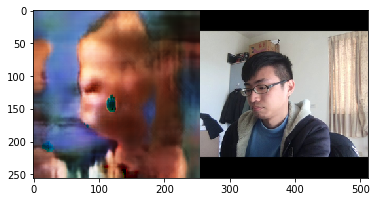

In [5]:
plt.imshow(frame)
plt.show()

In [6]:
frame.shape

(256, 512, 3)

## Preload image

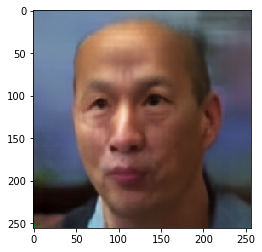

In [3]:
image = cv2.imread("./2.png")[:,:,::-1]
image = cv2.resize(image,(256,256))
g = generate_moving_image(G, image, e_vector, "cuda:0", fa)
plt.imshow(g)